Movie Recomendation Systems by OTT plateforms :
1. Content based recomendation system
2. Popularity based recomendation System
3. Collaborative Recomendation System

In [3]:
# everything is in form of text
# Similarity based algorithms : Association type of ML Model

In [4]:
import numpy as np
import pandas as pd
import difflib #user will give some movie name, and uske basis pr use movie suggest karna hai, user may do some mistakes in spelling. So compare with all movies in dataset with users spelling, best match will be returned
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity # most import part of this project

In [5]:
movies_data = pd.read_csv('/content/movies.csv')

In [6]:
movies_data.head(2)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski


In [7]:
movies_data.shape

(4803, 24)

In [8]:
# we are not going to use all the columns. Just we will use the best features

In [9]:
selected_features = ['genres','keywords','tagline','cast','director']

In [10]:
selected_features

['genres', 'keywords', 'tagline', 'cast', 'director']

In [11]:
movies_data.isnull().sum()

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

In [12]:
for features in selected_features: # keval apne kam vale features me count krna ho tb
  print(movies_data[features].isnull().sum())

28
412
844
43
30


In [13]:
# Replacing the missing values(NaN) with null string

In [14]:
for feature in selected_features :
  movies_data[feature] = movies_data[feature].fillna('') # keval kuch hi columns jika hme use hai , me NaN ko replace kro '' se. Sabme krne ka koi fayda nhi hai.

In [15]:
# once again, after replacement
for features in selected_features:
  print(movies_data[features].isnull().sum())

0
0
0
0
0


In [16]:
# combining all five selected features
combined_features = movies_data['genres']+' '+movies_data['keywords']+' '+movies_data['tagline']+' '+movies_data['cast']+' '+movies_data['director']

In [17]:
print(combined_features)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object


In [18]:
# converting the text data to tfidfVectorizer
vectorizer = TfidfVectorizer()


In [19]:
feature_vectors = vectorizer.fit_transform(combined_features)

In [20]:
print(feature_vectors)

  (0, 2432)	0.17272411194153
  (0, 7755)	0.1128035714854756
  (0, 13024)	0.1942362060108871
  (0, 10229)	0.16058685400095302
  (0, 8756)	0.22709015857011816
  (0, 14608)	0.15150672398763912
  (0, 16668)	0.19843263965100372
  (0, 14064)	0.20596090415084142
  (0, 13319)	0.2177470539412484
  (0, 17290)	0.20197912553916567
  (0, 17007)	0.23643326319898797
  (0, 13349)	0.15021264094167086
  (0, 11503)	0.27211310056983656
  (0, 11192)	0.09049319826481456
  (0, 16998)	0.1282126322850579
  (0, 15261)	0.07095833561276566
  (0, 4945)	0.24025852494110758
  (0, 14271)	0.21392179219912877
  (0, 3225)	0.24960162956997736
  (0, 16587)	0.12549432354918996
  (0, 14378)	0.33962752210959823
  (0, 5836)	0.1646750903586285
  (0, 3065)	0.22208377802661425
  (0, 3678)	0.21392179219912877
  (0, 5437)	0.1036413987316636
  :	:
  (4801, 17266)	0.2886098184932947
  (4801, 4835)	0.24713765026963996
  (4801, 403)	0.17727585190343226
  (4801, 6935)	0.2886098184932947
  (4801, 11663)	0.21557500762727902
  (4801, 1672

(0, 2432) 0.17272411194153: This means that in the first document (document 0), at feature index 2432, the TF-IDF score is approximately 0.1727 for that specific term or word.


(0, 7755) 0.1128035714854756: Similarly, in the first document, at feature index 7755, the TF-IDF score is approximately 0.1128 for another term.

The TF-IDF score quantifies the importance of a term within a document relative to the entire dataset. It considers both the term's frequency within the document (Term Frequency) and its rarity across the entire dataset (Inverse Document Frequency). Higher TF-IDF scores indicate terms that are more important or unique to a specific document.

In [21]:
# similarity score getting using cosine similarity

similarity = cosine_similarity(feature_vectors)

In [22]:
print(similarity)

[[1.         0.07219487 0.037733   ... 0.         0.         0.        ]
 [0.07219487 1.         0.03281499 ... 0.03575545 0.         0.        ]
 [0.037733   0.03281499 1.         ... 0.         0.05389661 0.        ]
 ...
 [0.         0.03575545 0.         ... 1.         0.         0.02651502]
 [0.         0.         0.05389661 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.02651502 0.         1.        ]]


In [23]:
similarity.shape

(4803, 4803)

In [24]:
# hr movie ki each other movie ke sath similarity score hota hai, like correlation.
# but here matrix size = n*n, where n is number of different data sets/ movies
# corrlation me matrix size = number of features * number of feeatures, na ki number of datapoints

<Axes: >

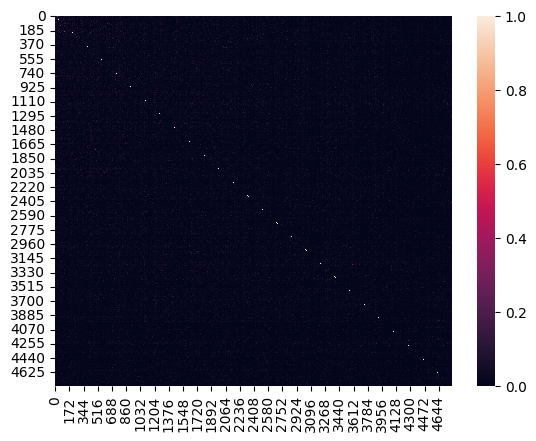

In [25]:
# lets do some fun thing ; system hang karvate hain, heatmap banake
import seaborn as sns
sns.heatmap(similarity)
# sooooo continuous heatmap

In [26]:
# getting the movie name from the user
movie_name = input("Please enter your favourite movie name : ")

Please enter your favourite movie name : iron man


In [27]:
# creating a list with all the movies names given in the dataset

list_of_all_titles = movies_data['title'].tolist()
list_of_all_titles # all 4803 movies name

['Avatar',
 "Pirates of the Caribbean: At World's End",
 'Spectre',
 'The Dark Knight Rises',
 'John Carter',
 'Spider-Man 3',
 'Tangled',
 'Avengers: Age of Ultron',
 'Harry Potter and the Half-Blood Prince',
 'Batman v Superman: Dawn of Justice',
 'Superman Returns',
 'Quantum of Solace',
 "Pirates of the Caribbean: Dead Man's Chest",
 'The Lone Ranger',
 'Man of Steel',
 'The Chronicles of Narnia: Prince Caspian',
 'The Avengers',
 'Pirates of the Caribbean: On Stranger Tides',
 'Men in Black 3',
 'The Hobbit: The Battle of the Five Armies',
 'The Amazing Spider-Man',
 'Robin Hood',
 'The Hobbit: The Desolation of Smaug',
 'The Golden Compass',
 'King Kong',
 'Titanic',
 'Captain America: Civil War',
 'Battleship',
 'Jurassic World',
 'Skyfall',
 'Spider-Man 2',
 'Iron Man 3',
 'Alice in Wonderland',
 'X-Men: The Last Stand',
 'Monsters University',
 'Transformers: Revenge of the Fallen',
 'Transformers: Age of Extinction',
 'Oz: The Great and Powerful',
 'The Amazing Spider-Man 2',

In [28]:
# finding the close match
find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
print(find_close_match)

['Iron Man', 'Iron Man 3', 'Iron Man 2']


In [29]:
close_match = find_close_match[0] # 0th index = most similar movie
print(close_match)

Iron Man


In [30]:
# finding the index of the movie with title
index_of_the_movie = movies_data[movies_data.title == close_match].index[0]
print(index_of_the_movie)


68


In [31]:
# getting list of similar movies

similarity_score = list(enumerate(similarity[index_of_the_movie])) # iron man ke similar movies ki list bna dega

print(similarity_score)

[(0, 0.033570748780675445), (1, 0.0546448279236134), (2, 0.013735500604224323), (3, 0.006468756104392058), (4, 0.03268943310073386), (5, 0.013907256685755473), (6, 0.07692837576335507), (7, 0.23944423963486405), (8, 0.007882387851851008), (9, 0.07599206098164225), (10, 0.07536074882460438), (11, 0.01192606921174529), (12, 0.013707618139948929), (13, 0.012376074925089967), (14, 0.09657127116284188), (15, 0.007286271383816743), (16, 0.22704403782296803), (17, 0.013112928084103857), (18, 0.04140526820609594), (19, 0.07883282546834255), (20, 0.07981173664799915), (21, 0.011266873271064948), (22, 0.006892575895462364), (23, 0.006599097891242659), (24, 0.012665208122549737), (25, 0.0), (26, 0.21566241096831154), (27, 0.030581282093826635), (28, 0.061074402219665376), (29, 0.014046184258938898), (30, 0.0807734659476981), (31, 0.31467052449477506), (32, 0.02878209913426701), (33, 0.13089810941050173), (34, 0.0), (35, 0.035350090674865595), (36, 0.03185325269937555), (37, 0.008024326882532318),

In [32]:
len(similarity_score)

4803

In [33]:
# highest similarity score vali movie we will recomment to the user

# sorting the movies based on similarity score

sorted_similar_movies = sorted(similarity_score, key=lambda x:x[1], reverse = True)
# x:x[1] means : based on the second element of each tuple. x[0] = first element of the tuple i.e. the index of the movie in the original file

In [34]:
print(sorted_similar_movies)

[(68, 1.0000000000000002), (79, 0.40890433998005965), (31, 0.31467052449477506), (7, 0.23944423963486405), (16, 0.22704403782296803), (26, 0.21566241096831154), (85, 0.20615862984665329), (182, 0.19573956139611606), (511, 0.16702973947860686), (3623, 0.1609246088135586), (64, 0.15299924139445145), (203, 0.14818667948665118), (174, 0.1471993120942043), (4401, 0.14505971470107848), (101, 0.14401677581826294), (46, 0.14216268867232237), (169, 0.1380947013224906), (1740, 0.13624382641690763), (94, 0.1361681957902901), (788, 0.1330589507422922), (126, 0.13263982780511066), (131, 0.13137698586006535), (33, 0.13089810941050173), (2487, 0.12309731939910507), (783, 0.12162995562040377), (138, 0.11846458075866884), (2442, 0.11725512335483321), (661, 0.11719294096248463), (607, 0.11387063493435637), (38, 0.1126182690487113), (2651, 0.1121878787373205), (353, 0.1116846512704428), (122, 0.10850296033661253), (1553, 0.1079782217151326), (1451, 0.107849394974707), (242, 0.10630339022327012), (618, 0.

In [35]:
# top movies in descending sorted list of movies will be better suggestion

In [37]:
print("Movies suggested for you : \n")

i=1
for movie in sorted_similar_movies :
  index = movie[0] # 68
  title_from_index = movies_data[movies_data.index == index]['title'].values[0]
  if(i<31): # print 31 movies similar to index 0 movie
    print(i,'.', title_from_index)
    i+=1

# is bar index se movie name/title dekh rhe hain, pichle step ka ulta

Movies suggested for you : 

1 . Iron Man
2 . Iron Man 2
3 . Iron Man 3
4 . Avengers: Age of Ultron
5 . The Avengers
6 . Captain America: Civil War
7 . Captain America: The Winter Soldier
8 . Ant-Man
9 . X-Men
10 . Made
11 . X-Men: Apocalypse
12 . X2
13 . The Incredible Hulk
14 . The Helix... Loaded
15 . X-Men: First Class
16 . X-Men: Days of Future Past
17 . Captain America: The First Avenger
18 . Kick-Ass 2
19 . Guardians of the Galaxy
20 . Deadpool
21 . Thor: The Dark World
22 . G-Force
23 . X-Men: The Last Stand
24 . Duets
25 . Mortdecai
26 . The Last Airbender
27 . Southland Tales
28 . Zathura: A Space Adventure
29 . Sky Captain and the World of Tomorrow
30 . The Amazing Spider-Man 2


In [42]:
#  movie Recommendation system in single cell

# getting the movie name from the user
movie_name = input("Please enter your favourite movie name : ")

# creating a list with all the movies names given in the dataset
list_of_all_titles = movies_data['title'].tolist()

# finding the close match
find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)

close_match = find_close_match[0] # 0th index = most similar movie

# finding the index of the movie with title
index_of_the_movie = movies_data[movies_data.title == close_match].index[0]

# getting list of similar movies
similarity_score = list(enumerate(similarity[index_of_the_movie])) # iron man ke similar movies ki list bna dega

# sorting the movies based on similarity score
sorted_similar_movies = sorted(similarity_score, key=lambda x:x[1], reverse = True)

# suggested movies to user
print("Movies suggested for you : \n")
i=1
for movie in sorted_similar_movies :
  index = movie[0] # 68 i.e. the original movie itself
  title_from_index = movies_data[movies_data.index == index]['title'].values[0]
  if(i<31): # print 31 movies similar to index 0 movie
    print(i,'.', title_from_index)
    i+=1

Please enter your favourite movie name : avtar
Movies suggested for you : 

1 . Avatar
2 . Alien
3 . Aliens
4 . Guardians of the Galaxy
5 . Star Trek Beyond
6 . Star Trek Into Darkness
7 . Galaxy Quest
8 . Alien³
9 . Cargo
10 . Trekkies
11 . Gravity
12 . Moonraker
13 . Jason X
14 . Pocahontas
15 . Space Cowboys
16 . The Helix... Loaded
17 . Lockout
18 . Event Horizon
19 . Space Dogs
20 . Machete Kills
21 . Gettysburg
22 . Clash of the Titans
23 . Star Wars: Clone Wars: Volume 1
24 . The Right Stuff
25 . Terminator Salvation
26 . The Astronaut's Wife
27 . Planet of the Apes
28 . Star Trek
29 . Wing Commander
30 . Sunshine
